# Содержание  
1. Подготовка таблицы для АНОВА
2. Подготовка таблиц для постороения таймкурсов по объединенным группам сенсоров (левые, правые) индивидуально для каждого испытуемого

# Подготовка таблицы для ANOVA (для экстремумов) из МЭГ данных

In [110]:
import mne
import os.path as op
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import copy
import pandas as pd
import statsmodels.stats.multitest as mul
import os

# Находим экстремумы для каждого кондишена, для левой и правой руки

first, we look for extrems for each subjects, then we average obtained extrems values   
1) Функции для поиска экстремумов

In [5]:
# We get an array with data for each subjects, and each sensor

############ MINIMUM ###############

def min_beta_and_time_for_min(subjects, data_path, planar, tmin, tmax): 
#Make list of evoked
    all_evoked = []
    for subj in subjects:
        data = op.join(data_path, planar.format(subj)) #If you need to make combine planar for beta, please use the combine_planar.py
        evk = mne.Evoked(data)
        all_evoked.append(evk)

    #shift time scale if it is needed
    #what the hell is going on here????????
    #for i in all_evoked:
    #   i.shift_time(-2.0, relative=False)

# calculate average data for interval. You have to choose interval - downward, upward or susteined (look at the beggining of script)
    interval = []
    
    for i in all_evoked:
        x = i.crop(tmin=tmin, tmax=tmax)   #crop - mne function
        interval.append(x)
        
        # x = list of Evoked

    min_beta = []
    index_min_beta = []    #for searching of time point of min beta on sensor
    for i in interval:
        m = np.min(i.data, axis = 1)
        t = np.argmin(i.data, axis = 1) #indexes of min
        a = m.tolist()
        b = t.tolist()

        min_beta.append(a)
        index_min_beta.append(b)
    
    # search time of beta minimum
    time = []
    for i in range(len(index_min_beta)):
        time_per_subj = [] # 102 time point for every sensors
        for j in index_min_beta[i]:
            # find time between time points
            #interval[0].data.shape[1] - amount of points on interval
            # j - index of extremum point
            time_between_points = (tmin - tmax)/(interval[0].data.shape[1]-1)
            t = tmin - time_between_points*j
            time_per_subj.append(t)
        time.append(time_per_subj)

    #make np.array from list
    min_interval_array = np.array(min_beta)
    min_time_array = np.array(time)
    
    return(min_interval_array, min_time_array) 
#return array 102x28, e.g. sets power of min beta signal and time of min for each sensor for each subject
#28 - amount of subjects
#102 - amount of combined planars

In [6]:
############ MAXIMUM ###############

def max_beta_and_time_for_max(subjects, data_path, planar, tmin, tmax): 
#Make list of evoked
    all_evoked = []
    for subj in subjects:
        data = op.join(data_path, planar.format(subj)) #If you need to make combine planar for beta, please use the combine_planar.py
        evk = mne.Evoked(data)
        all_evoked.append(evk)

    #shift time scale if it is needed
    #what the hell is going on here????????
    #for i in all_evoked:
    #    i.shift_time(-2.0, relative=False)

# calculate average data for interval. You have to choose interval - downward, upward or sustained (look at the beggining of script)
    interval = []
    
    for i in all_evoked:
        x = i.crop(tmin=tmin, tmax=tmax)   #crop - mne function
        interval.append(x)

    #calculate mean beta on choosen interval for each subjects
    
    max_beta = []
    index_max_beta = []    
    for i in interval:
        m = np.max(i.data, axis = 1)
        t = np.argmax(i.data, axis = 1) #indexes of min
        a = m.tolist()
        b = t.tolist()

        max_beta.append(a)
        index_max_beta.append(b)
    
    # search time of beta minimum
    time = []
    for i in range(len(index_max_beta)):
        time_per_subj = [] # 102 time point for every sensors
        for j in index_max_beta[i]:
            # find time between time points
            #interval[0].data.shape[1] - amount of points on interval
            # j - index of extremum point
            time_between_points = (tmin - tmax)/(interval[0].data.shape[1]-1)
            t = tmin - time_between_points*j
            time_per_subj.append(t)
        time.append(time_per_subj)
        
    ############### Another method to find times ##################
    #np.array with time point the same for every sensors and every subjects
    
    '''
    time_array = interval[0].times
    
    for i in range(len(index_max_beta)):
        time_per_subj = [] # 102 time point for every sensors
        for j in index_max_beta[i]:
            time_per_subj.append(time_array[j])
    
        time.append(time_per_subj)
    '''

    #make np.array from list
    max_interval_array = np.array(max_beta)
    max_time_array = np.array(time)
    
    return(max_interval_array, max_time_array)        

#return array 102x28, e.g. sets power of max beta signal and time of max for each sensor for each subject   
#28 - amount of subjects
#102 - amount of combined planars

# Right hand Self_paced (Пример)

In [7]:
data_path = '/home/vtretyakova/Рабочий стол/selfpased_hands_15_25/beta_ave_comb_planar_self_paced_right_hand_15_25'
planar = "{0}_comb_planar_right_hand_self_paced.fif"

subjects = []
for i in range(1,29):
    if i < 10:
        subjects += ['L00' + str(i)]
    else:
        subjects += ['L0' + str(i)]
        
subjects.remove('L015') # для данного испытуемого не нашлось подходящих эвентов
        
tmin = -1.0
tmax = 1.4

In [8]:
# Находим минимумы и максимумы беты
min_interval_array_self_pace, min_time_array_self_pace  = min_beta_and_time_for_min(subjects, data_path, planar, tmin = tmin, 
                                                                               tmax = tmax)

max_interval_array_self_pace, max_time_array_self_pace = max_beta_and_time_for_max(subjects, data_path, planar, tmin = tmin, 
                                                                                              tmax = tmax)

    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method sel

        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrice

Функция позволяет получить массив 27 (количество испытуемых) на 102 (количество сенсоров)

In [10]:
min_interval_array_self_pace.shape

(27, 102)

Теперь необходимо выделить левую и правую группы сенсоров (т.е. находящихся в зоне правой и левой руки соответственно), а именно сенсоры 0432, 0442, 0422 (левая группа); 1142, 1112, 1132 (правая группа). Для этого вначале найдем порядковый номер этих сенсоров

In [99]:
s = pd.read_csv('/home/vtretyakova/Рабочий стол/ANOVA_for_extrem/sensors.csv', index_col ="Name")
left_group = s.loc[["MEG0432", "MEG0442", "MEG0422"]]
right_group = s.loc[["MEG1142", "MEG1112", "MEG1132"]]

In [100]:
#Делаем списки порядковых номеров сенсоров
l_group_sensors = left_group['Unnamed: 0'].tolist()
r_group_sensors = right_group['Unnamed: 0'].tolist()

print(l_group_sensors)
print(r_group_sensors)

[14, 15, 13]
[41, 38, 40]


In [22]:
len(min_interval_array_self_pace)

27

In [23]:
# формируем список списков соcтоящий из трех списков (сенсоры), в каждом по 27 элементов (число испытуемых)
min_rh_three = []
for i in l_group_sensors:
    min_right_hand = []
    for j in range(len(min_interval_array_self_pace)):
        a = min_interval_array_self_pace[j][i]
        min_right_hand.append(a)
    min_rh_three.append(min_right_hand)
    
    

In [25]:
min_rh_three = np.array(min_rh_three)

In [27]:
#Находим среднее значение для минимума беты для всех трех сенсоров

min_rh_ave = np.mean(min_rh_three, axis = 0)

min_rh_ave.shape

(27,)

Для подготовки таблицы для АНОВА нам необходимо получить ДатаФрейм состоящий из следующих столбцов:      
- кондишен   
- наименование руки   
- минимальное значение беты   
- максимальное значение беты   

Для удобства оборачиваем разработанный выше алгоритм в функцию и добавляем туда создание списков кондишена и руки

In [67]:
def dataframe_for_anova (subjects, data_path, planar, tmin, tmax, group_sensors, hand, condition):
    min_array, min_time_array = min_beta_and_time_for_min(subjects, data_path, planar, tmin = tmin, tmax = tmax)

    max_array, max_time_array = max_beta_and_time_for_max(subjects, data_path, planar, tmin = tmin, tmax = tmax)
    
    
    ################ MINIMUM ##################
    min_three_chan = [] # формируем список списков соcтоящий из трех списков (сенсоры), в каждом по 27 элементов (число испытуемых)
    for i in group_sensors:
        minimum = [] #для каждого из выбранных сенсоров выбираем максимум у для каждого испытуемого
        for j in range(len(min_array)):
            a = min_array[j][i]
            minimum.append(a)
        min_three_chan.append(minimum)
        
    # делаем np.array из списка
    min_three_chan = np.array(min_three_chan)   
    
    #Усредняем по каналам
    min_ave = np.mean(min_three_chan, axis = 0).tolist()
    
    ###################MAXIMUM ####################
    max_three_chan = [] # формируем список списков сотоящий из трех списков (сенсора), в каждом по 27 элементов (число испытуемых)
    for i in group_sensors:
        maximum = [] #для каждого из выбранных сенсоров выбираем максимум у для каждого испытуемого
        for j in range(len(max_array)):
            a = max_array[j][i]
            maximum.append(a)
        max_three_chan.append(maximum)
        
    # делаем np.array из списка
    max_three_chan = np.array(max_three_chan)   
    
    #Усредняем по каналам
    max_ave = np.mean(max_three_chan, axis = 0).tolist()
    
    h = [hand]*len(max_ave) # делаем список с количество элеметов, равному количеству испытуемых для наименования руки
    
    сondit = [condition]*len(max_ave) #тоже что и предыдущее для кондищена
    
    return(min_ave, max_ave, h, condit)

In [68]:
hand = 'right'
condition = 'self_pased'

min_ave, max_ave, h, condit = dataframe_for_anova (subjects, data_path, planar, tmin, tmax, l_group_sensors, hand, condition)

    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method sel

        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrice

In [69]:
print(min_ave)
print(max_ave)
print(h)
print(condit)

[-0.9380229175253092, -2.664419926418148, -1.6540238238492933, -1.1237275215363087, -1.9235411797354516, -2.272969744773846, -0.9398377002181432, -1.3867824386626186, -10.365288000123277, -1.4033904069020882, -12.768681165444358, -2.0316283119606218, -6.735504214452258, -1.931798641187849, -1.0539629511970432, -1.7079783659605947, -6.936823396021737, -3.907967011015463, -6.984889146048128, -4.4344568959402295, -13.425638081583656, -2.587291167972699, -3.2720004845121573, -4.000016303009384, -4.704884078506173, -4.00008327901035, -7.431138176482572]
[7.701319641711639, 1.669128610733755, 4.719327044047759, 6.661884138724067, 5.742316541464864, 3.9453380942209813, 3.3733692859737894, 2.9978558565592786, 6.307499834947549, 2.4050711706786103, 0.6250934650131938, 1.1771593076400724, 4.2266933196111625, 1.633213596882565, 4.054320250459057, 3.7077825387956787, 3.695033247945181, 1.62970536483198, 4.645764098987058, 1.769537838848218, 6.453392007717828, 5.365060557358561, 1.2376918498462217,

#### Разобранный выше алгоритм реализован в скрипте:   
table_for_ANOVA.py

# Формирование таблиц для построения таймкурсов по объединенным трем сенсорам (левая и правая группа), отдельно для каждого испытуемого 

In [107]:
def beta(subjects, data_path, planar, tmin, tmax): 
#Make list of evoked
    all_evoked = []
    for subj in subjects:
        data = op.join(data_path, planar.format(subj)) #If you need to make combine planar for beta, please use the combine_planar.py
        evk = mne.Evoked(data)
        all_evoked.append(evk)

    #shift time scale if it is needed
    #what the hell is going on here????????
    #for i in all_evoked:
    #   i.shift_time(-2.0, relative=False)

# calculate average data for interval. You have to choose interval - downward, upward or susteined (look at the beggining of script)
    interval = []
    
    for i in all_evoked:
        x = i.crop(tmin=tmin, tmax=tmax)   #crop - mne function
        interval.append(x.data)
        
    n = ((tmax*1000-tmin*1000)/(len(x.data[0])-1))/1000
    
    time = np.arange(tmin, (tmax + 0.001), n)
    
    
        
    return(interval, time) # возвращает список из 27 элементов (количество испытуемых), каждый элемент списка - np.array, содеражащая значение бета для каждого из 102 сенсоров

In [88]:
data_path = '/home/vtretyakova/Рабочий стол/selfpased_hands_15_25/beta_ave_comb_planar_self_paced_right_hand_15_25'
planar = "{0}_comb_planar_right_hand_self_paced.fif"

subjects = []
for i in range(1,29):
    if i < 10:
        subjects += ['L00' + str(i)]
    else:
        subjects += ['L0' + str(i)]
        
subjects.remove('L015') # для данного испытуемого не нашлось подходящих эвентов
        
tmin = -1.0
tmax = 1.4

In [108]:
interval, time = beta_ave_three_sensors(subjects, data_path, planar, tmin, tmax)

    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method sel

In [102]:
type(interval[0][0])

numpy.ndarray

In [103]:
# формируем список списков соcтоящий из 27 списков (число испытуемых), в каждом по 721 элемент (временных точек)
    
three_sens_beta_all_subj = []    
for i in range(len(interval)):
    three_sens_beta = []
    for j in l_group_sensors:
        a = interval[i][j]
        three_sens_beta.append(a)
    b = np.array(three_sens_beta)    
    mean_amp = np.mean(b.data, axis = 0)
    three_sens_beta_all_subj.append(mean_amp)

In [106]:
len(three_sens_beta_all_subj[0])

721

In [109]:
len(time)

721

In [111]:
data = pd.DataFrame()
data['Time, s'] = time.tolist()
data['Beta average (three sens)'] = three_sens_beta_all_subj[0].tolist()
data.head()

,"Time, s",Beta average (three sens)
0,-1.000000,0.263205
1,-0.996667,0.252489
2,-0.993333,0.249349
3,-0.990000,0.243287
4,-0.986667,0.248499


In [124]:
xmin = -1.1
xmax = 1.5
ymin = -3
ymax = 9
color='y'

Для проверки адекватности функции построим таймкурс для одного испытуемого

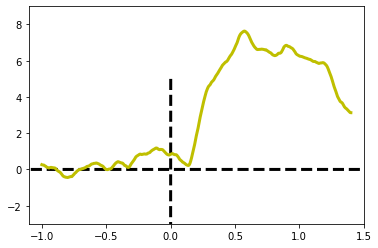

In [127]:
plt.figure() #создаем рисунок 
plt.rcParams['axes.facecolor'] = 'none' # делаем его прозрачным
plt.xlim(xmin, xmax) #назначаем границы рисунка по х
plt.ylim(ymin, ymax) #назначаем границы рисунка по у
#plt.title(title = 'Koal', fontsize = 8) 
plt.plot([0, 0.001], [-5, 5], color='k', linewidth=3, linestyle='--', zorder=1) # вертикальная линия, которая показывает, где находится наше событие
plt.plot([-9, 9], [0, 0.001], color='k', linewidth=3, linestyle='--', zorder=1) # нулевая линия по горизонтали

plt.plot(data['Time, s'], data['Beta average (three sens), dB'], color=color, linewidth=3) # рисует график первого кондишена (всегда синий)

##### Описанный выше алгоритм реализован в скрипте:  
table_for_timecourse.py